In [53]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

curdir = Path('./')

In [54]:
# TEST SET validation data
test_validation_data = pd.DataFrame()
for f in curdir.glob('eval*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    # Parameter configuration (not saved in runs!!)
    # The weights are relative to classes in alphabetical order:
    # AddToCart, None, SearchDatabase, SearchMemory, SpecifyInfo
    if filename[5:]=='20210828-135516':
        weights = "1.0, 0.9, 1.0, 3.0, 0.8"
    elif filename[5:]=='20210828-153524':
        weights = "1.0, 0.9, 1.0, 2.0, 0.8"
    elif filename[5:]=='20210828-163541':
        weights = "1.0, 0.9, 0.95, 2.0, 0.8"
    elif filename[5:]=='20210828-173521':
        weights = "1.0, 0.9, 0.85, 3.0, 0.8"
    elif filename[5:]=='20210828-185724':
        weights = "1.0, 0.9, 0.8, 3.5, 0.75"
    elif filename[5:]=='20210828-150402' or filename[5:]=='20210828-205725' or filename[5:]=='20210828-224851':
        weights = "??, ??, ??, ??, ??"
    else:
        weights = "1.0, 0.9, 0.85, 3.0, 0.8"
    df['weights'] = [weights]    
    test_validation_data = pd.concat([test_validation_data, df])
print(test_validation_data.head(20))
print(test_validation_data.shape)

   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.853993           4.398207            0.792229   
0         0.844914           4.029370            0.764062   
0         0.849917           4.982141            0.784690   
0         0.854549           4.531001            0.800184   
0         0.857143           4.570284            0.795883   
0         0.856587           4.340371            0.790465   
0         0.853437           4.402912            0.794786   
0         0.855290           4.365465            0.797576   
0         0.854178           4.380371            0.789539   
0         0.855661           4.323701            0.789262   
0         0.853993           4.450030            0.798850   
0         0.851584           4.428542            0.793953   
0         0.856587           4.399322            0.801858   
0         0.846952           5.993121            0.791954   
0         0.852325           4.605227            0.785384   

                       

In [55]:
df_classes = pd.DataFrame()
for f in curdir.glob('classes*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    df_classes = pd.concat([df_classes, df])
print(df_classes.head())
print(df_classes.shape)

                0                 filename
0       AddToCart  classes-20210829-085441
1            None  classes-20210829-085441
2  SearchDatabase  classes-20210829-085441
3    SearchMemory  classes-20210829-085441
4     SpecifyInfo  classes-20210829-085441
(75, 2)


In [56]:
# Training data statistics
training_stat = pd.DataFrame()
for f in curdir.glob('stats*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    training_stat = pd.concat([training_stat, df])
print(training_stat.head())
print(training_stat.shape)

       Training Loss  Valid. Loss  Valid. Accur. class.  \
epoch                                                     
1           1.181306     1.130998              0.836322   
2           1.129415     1.120064              0.841731   
3           1.108039     1.111577              0.846285   
4           1.085227     1.091440              0.858810   
5           1.069410     1.085972              0.859379   

       Valid. Accur. mult.label Training Time Validation Time  \
epoch                                                           
1                      0.904925       0:09:12         0:00:30   
2                      0.923427       0:09:15         0:00:30   
3                      0.925989       0:09:14         0:00:30   
4                      0.939368       0:09:14         0:00:30   
5                      0.946769       0:09:14         0:00:30   

                                                 metrics  \
epoch                                                      
1      {'a

In [57]:
# Training validazione data
validation_data = pd.DataFrame()
for f in curdir.glob('testdata*'):
    filename = f.name
    df = pd.read_pickle(f)
    df['filename'] = filename
    validation_data = pd.concat([validation_data, df])
print(validation_data.head())
print(validation_data.shape)

   epoch  batchnum                                     actions_logits  \
0      1         1  [[2.8968439e-06, 0.00030198833, 2.5595868e-05,...   
1      1         2  [[1.0172097e-05, 0.99991214, 4.9763345e-05, 1....   
2      1         3  [[8.648221e-06, 0.00016811727, 6.26811e-05, 1....   
3      1         4  [[0.999877, 2.7939372e-05, 5.4882443e-05, 2.34...   
4      1         5  [[7.313683e-07, 2.1050717e-05, 3.9747406e-06, ...   

                         actions_labels  \
0  [1, 4, 2, 4, 0, 1, 1, 4, 4, 0, 1, 2]   
1  [1, 4, 2, 2, 0, 1, 2, 1, 1, 1, 1, 4]   
2  [4, 1, 1, 1, 4, 2, 1, 2, 0, 1, 1, 1]   
3  [0, 0, 1, 2, 0, 1, 4, 4, 0, 1, 1, 4]   
4  [1, 4, 2, 4, 0, 3, 1, 1, 2, 4, 1, 1]   

                                   attributes_logits  \
0  [[7.9900565e-06, 8.733709e-06, 0.005222038, 0....   
1  [[9.605304e-05, 0.0001056691, 0.0032138114, 0....   
2  [[8.640665e-05, 4.538203e-05, 0.9122547, 0.000...   
3  [[5.4637352e-05, 7.9891135e-05, 0.0027858089, ...   
4  [[0.00011458046, 0.

In [65]:
# Data analysis 
case_study = test_validation_data[test_validation_data['weights'] == "1.0, 0.9, 0.85, 3.0, 0.8"]
print(case_study.shape)
print(f"MAX action accuracy: {max(case_study['action_accuracy'])}, MAX attribute accuracy: {max(case_study['attribute_accuracy'])}")
print(case_study)
print('Action accuracy order')
print(case_study.sort_values(by=['action_accuracy'], ascending=False))
print('Attribute accuracy order')
print(case_study.sort_values(by=['attribute_accuracy'], ascending=False))
print('Order by act_acc+att_acc-act_per')
perplexity_weight_full = case_study['action_accuracy'] + case_study['attribute_accuracy'] - case_study['action_perplexity']
case_study.insert(case_study.shape[1], 'perplexity_weight_full', perplexity_weight_full)
perplexity_weight_cent = case_study['action_accuracy'] + case_study['attribute_accuracy'] - case_study['action_perplexity']/100
case_study.insert(case_study.shape[1], 'perplexity_weight_cent', perplexity_weight_cent)
perplexity_weight_cent_halved = case_study['action_accuracy'] + case_study['attribute_accuracy'] - case_study['action_perplexity']/200
case_study.insert(case_study.shape[1], 'perplexity_weight_cent_halved', perplexity_weight_cent_halved)
print(case_study)

(8, 7)
MAX action accuracy: 0.8571428571428571, MAX attribute accuracy: 0.8018583177261083
   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.844914           4.029370            0.764062   
0         0.854549           4.531001            0.800184   
0         0.857143           4.570284            0.795883   
0         0.856587           4.340371            0.790465   
0         0.855290           4.365465            0.797576   
0         0.855661           4.323701            0.789262   
0         0.851584           4.428542            0.793953   
0         0.856587           4.399322            0.801858   

                                    confusion_matrix  \
0  [[747.0, 50.0, 15.0, 3.0, 16.0], [28.0, 1076.0...   
0  [[743.0, 50.0, 13.0, 4.0, 14.0], [25.0, 1037.0...   
0  [[743.0, 52.0, 6.0, 4.0, 18.0], [28.0, 1039.0,...   
0  [[743.0, 47.0, 11.0, 2.0, 14.0], [29.0, 1054.0...   
0  [[742.0, 46.0, 6.0, 3.0, 14.0], [27.0, 1039.0,...   
0  [[740.0, 42.0, 9.0, 

In [79]:
print("Perplexity weight full")
print(case_study.sort_values(by=['perplexity_weight_full'], ascending=False).loc[:, ['action_accuracy', 'action_perplexity', 'attribute_accuracy', 'perplexity_weight_full', 'perplexity_weight_cent', 'perplexity_weight_cent_halved']])
print("Perplexity weight cent")
print(case_study.sort_values(by=['perplexity_weight_cent'], ascending=False).loc[:, ['action_accuracy', 'action_perplexity', 'attribute_accuracy', 'perplexity_weight_full', 'perplexity_weight_cent', 'perplexity_weight_cent_halved']])
print("Perplexity weight cent and halved")
print(case_study.sort_values(by=['perplexity_weight_cent_halved'], ascending=False).loc[:, ['action_accuracy', 'action_perplexity', 'attribute_accuracy', 'perplexity_weight_full', 'perplexity_weight_cent', 'perplexity_weight_cent_halved']])

Perplexity weight full
   action_accuracy  action_perplexity  attribute_accuracy  \
0         0.844914           4.029370            0.764062   
0         0.855661           4.323701            0.789262   
0         0.856587           4.340371            0.790465   
0         0.855290           4.365465            0.797576   
0         0.856587           4.399322            0.801858   
0         0.851584           4.428542            0.793953   
0         0.854549           4.531001            0.800184   
0         0.857143           4.570284            0.795883   

   perplexity_weight_full  perplexity_weight_cent  \
0               -2.420395                1.568682   
0               -2.678778                1.601686   
0               -2.693320                1.603648   
0               -2.712598                1.609212   
0               -2.740877                1.614452   
0               -2.783005                1.601252   
0               -2.876268                1.609423   
0  

In [59]:
case_study.describe()

,action_accuracy,action_perplexity,attribute_accuracy,arbitrary_choice
count,8.000000,8.000000,8.000000,8.000000
mean,0.854039,4.373507,0.791655,-2.727812
std,0.004077,0.164445,0.011974,0.150938
min,0.844914,4.029370,0.764062,-2.917258
25%,0.853808,4.336204,0.790164,-2.806321
50%,0.855475,4.382393,0.794918,-2.726737
75%,0.856587,4.454157,0.798228,-2.689684
max,0.857143,4.570284,0.801858,-2.420395


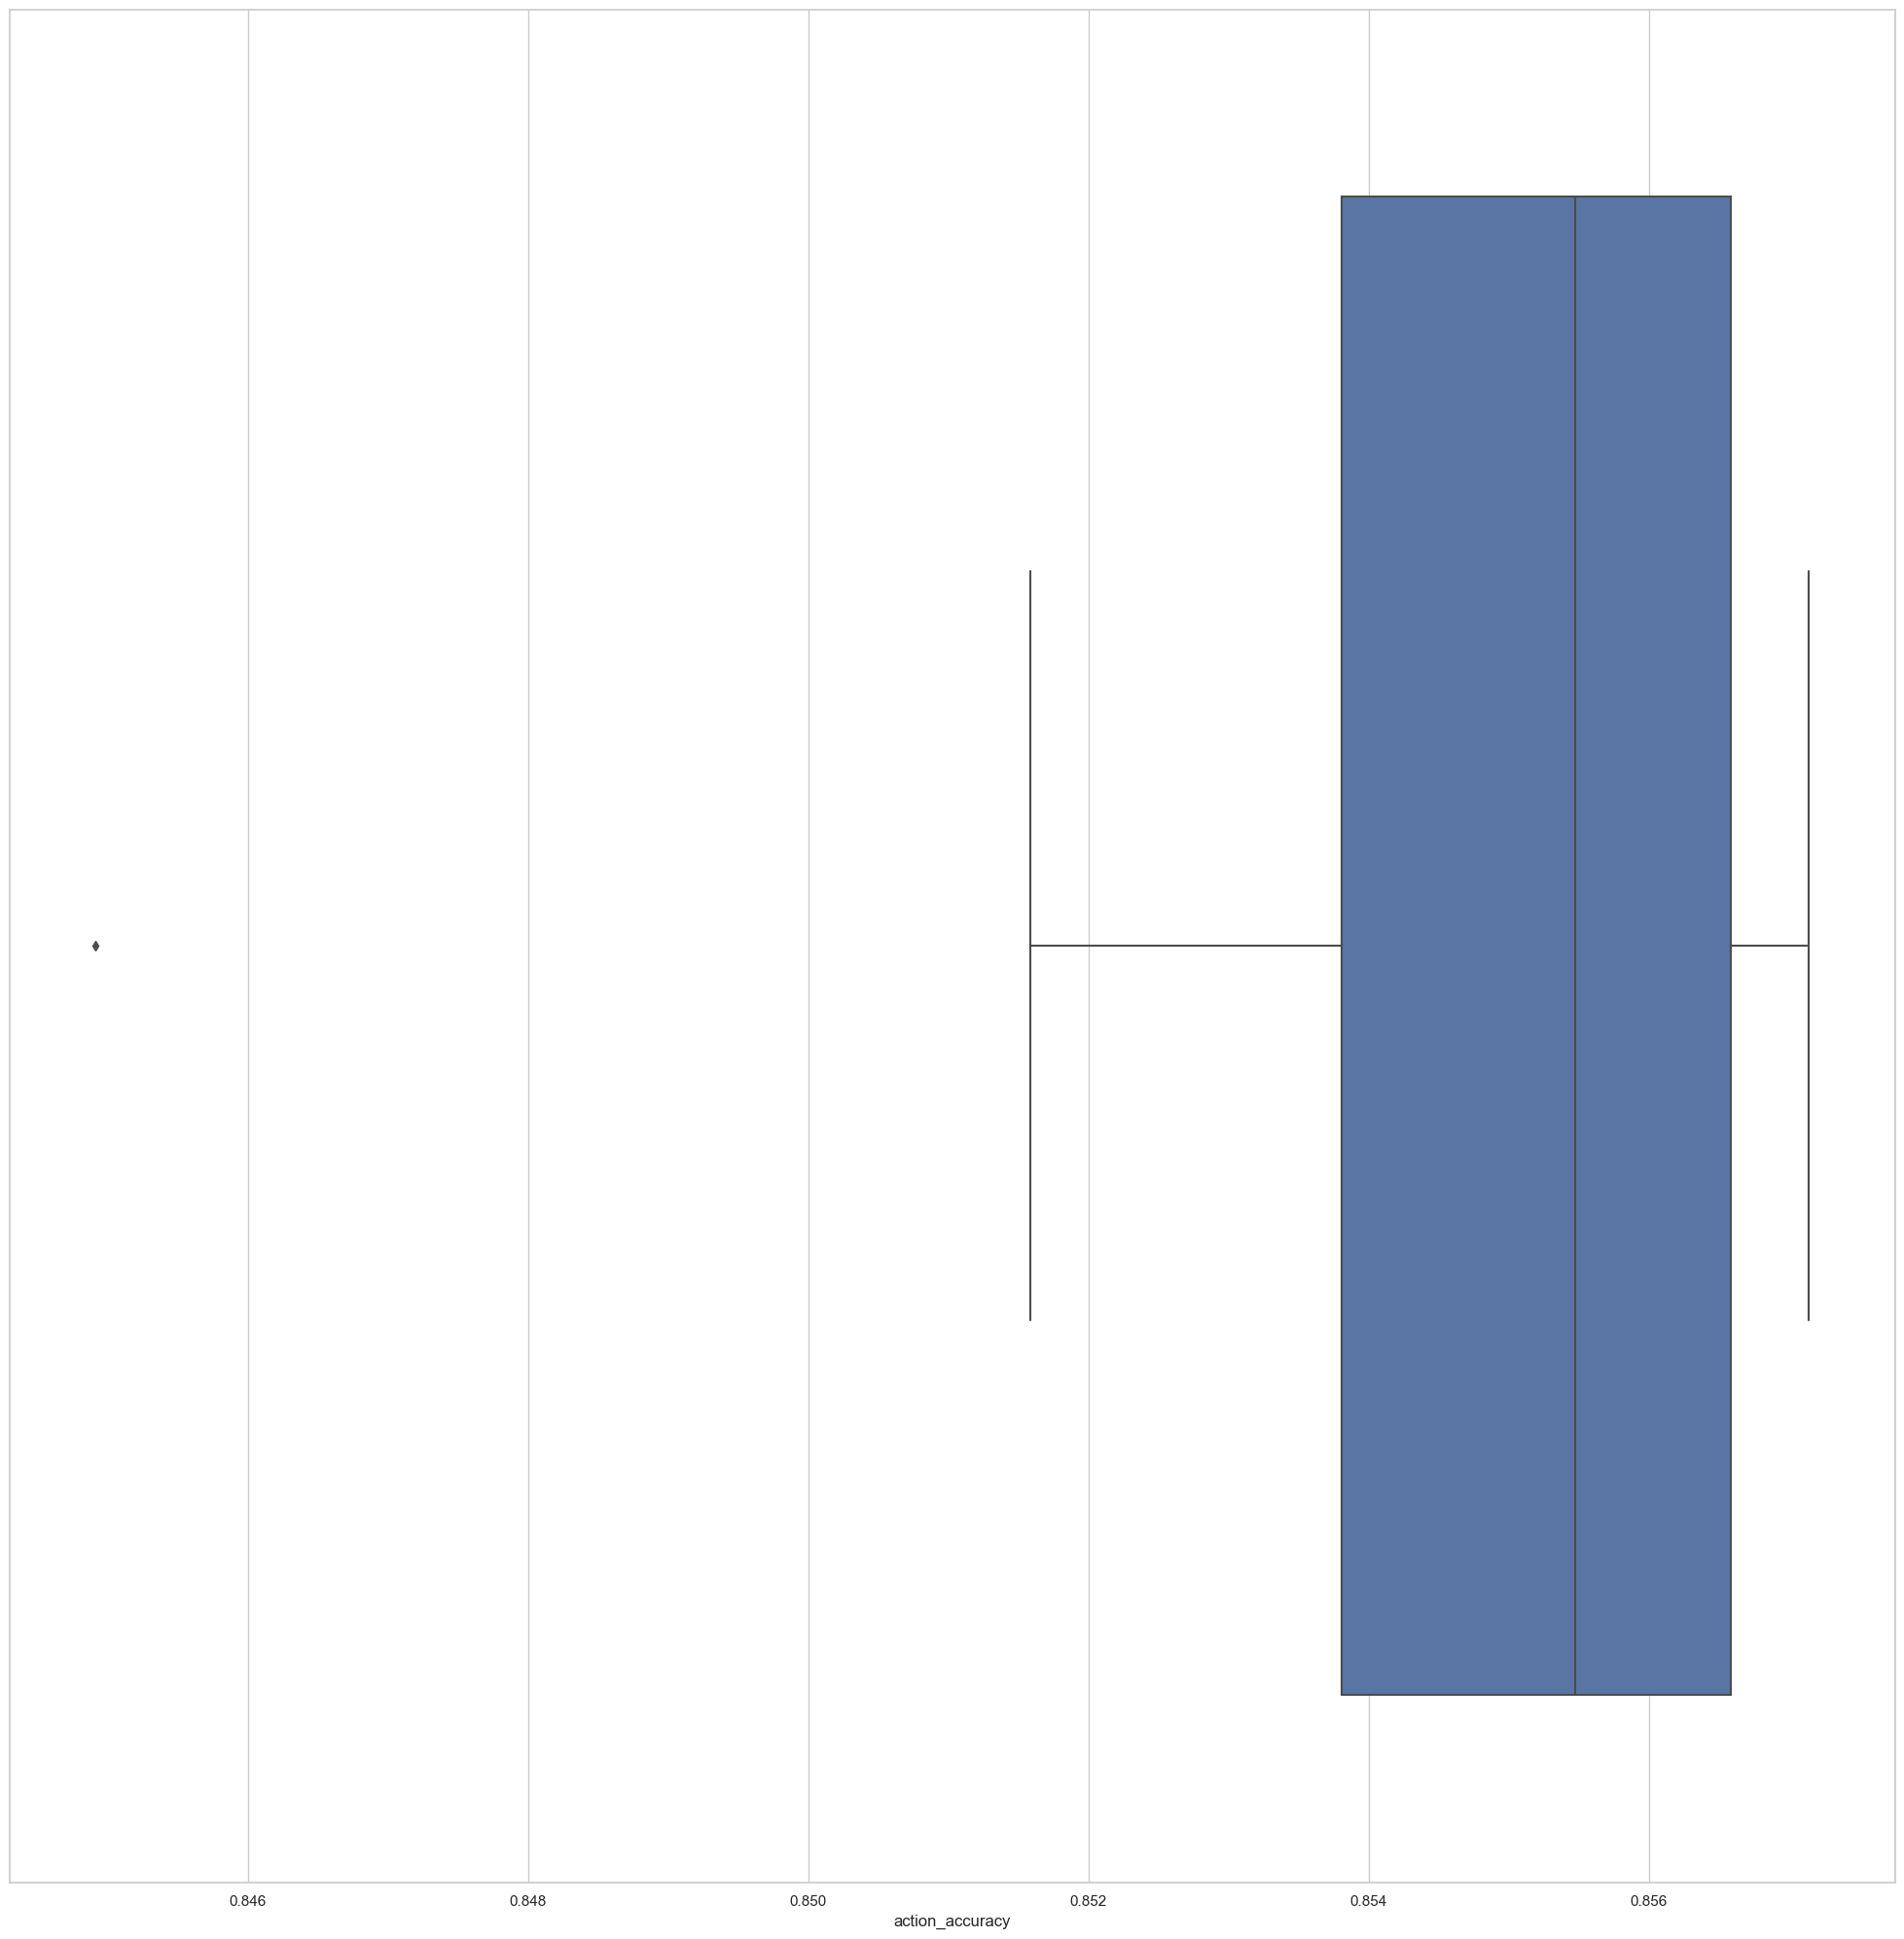

In [60]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=case_study["action_accuracy"], data=case_study)
plt.rcParams["figure.figsize"] = (25,25)
plt.show()

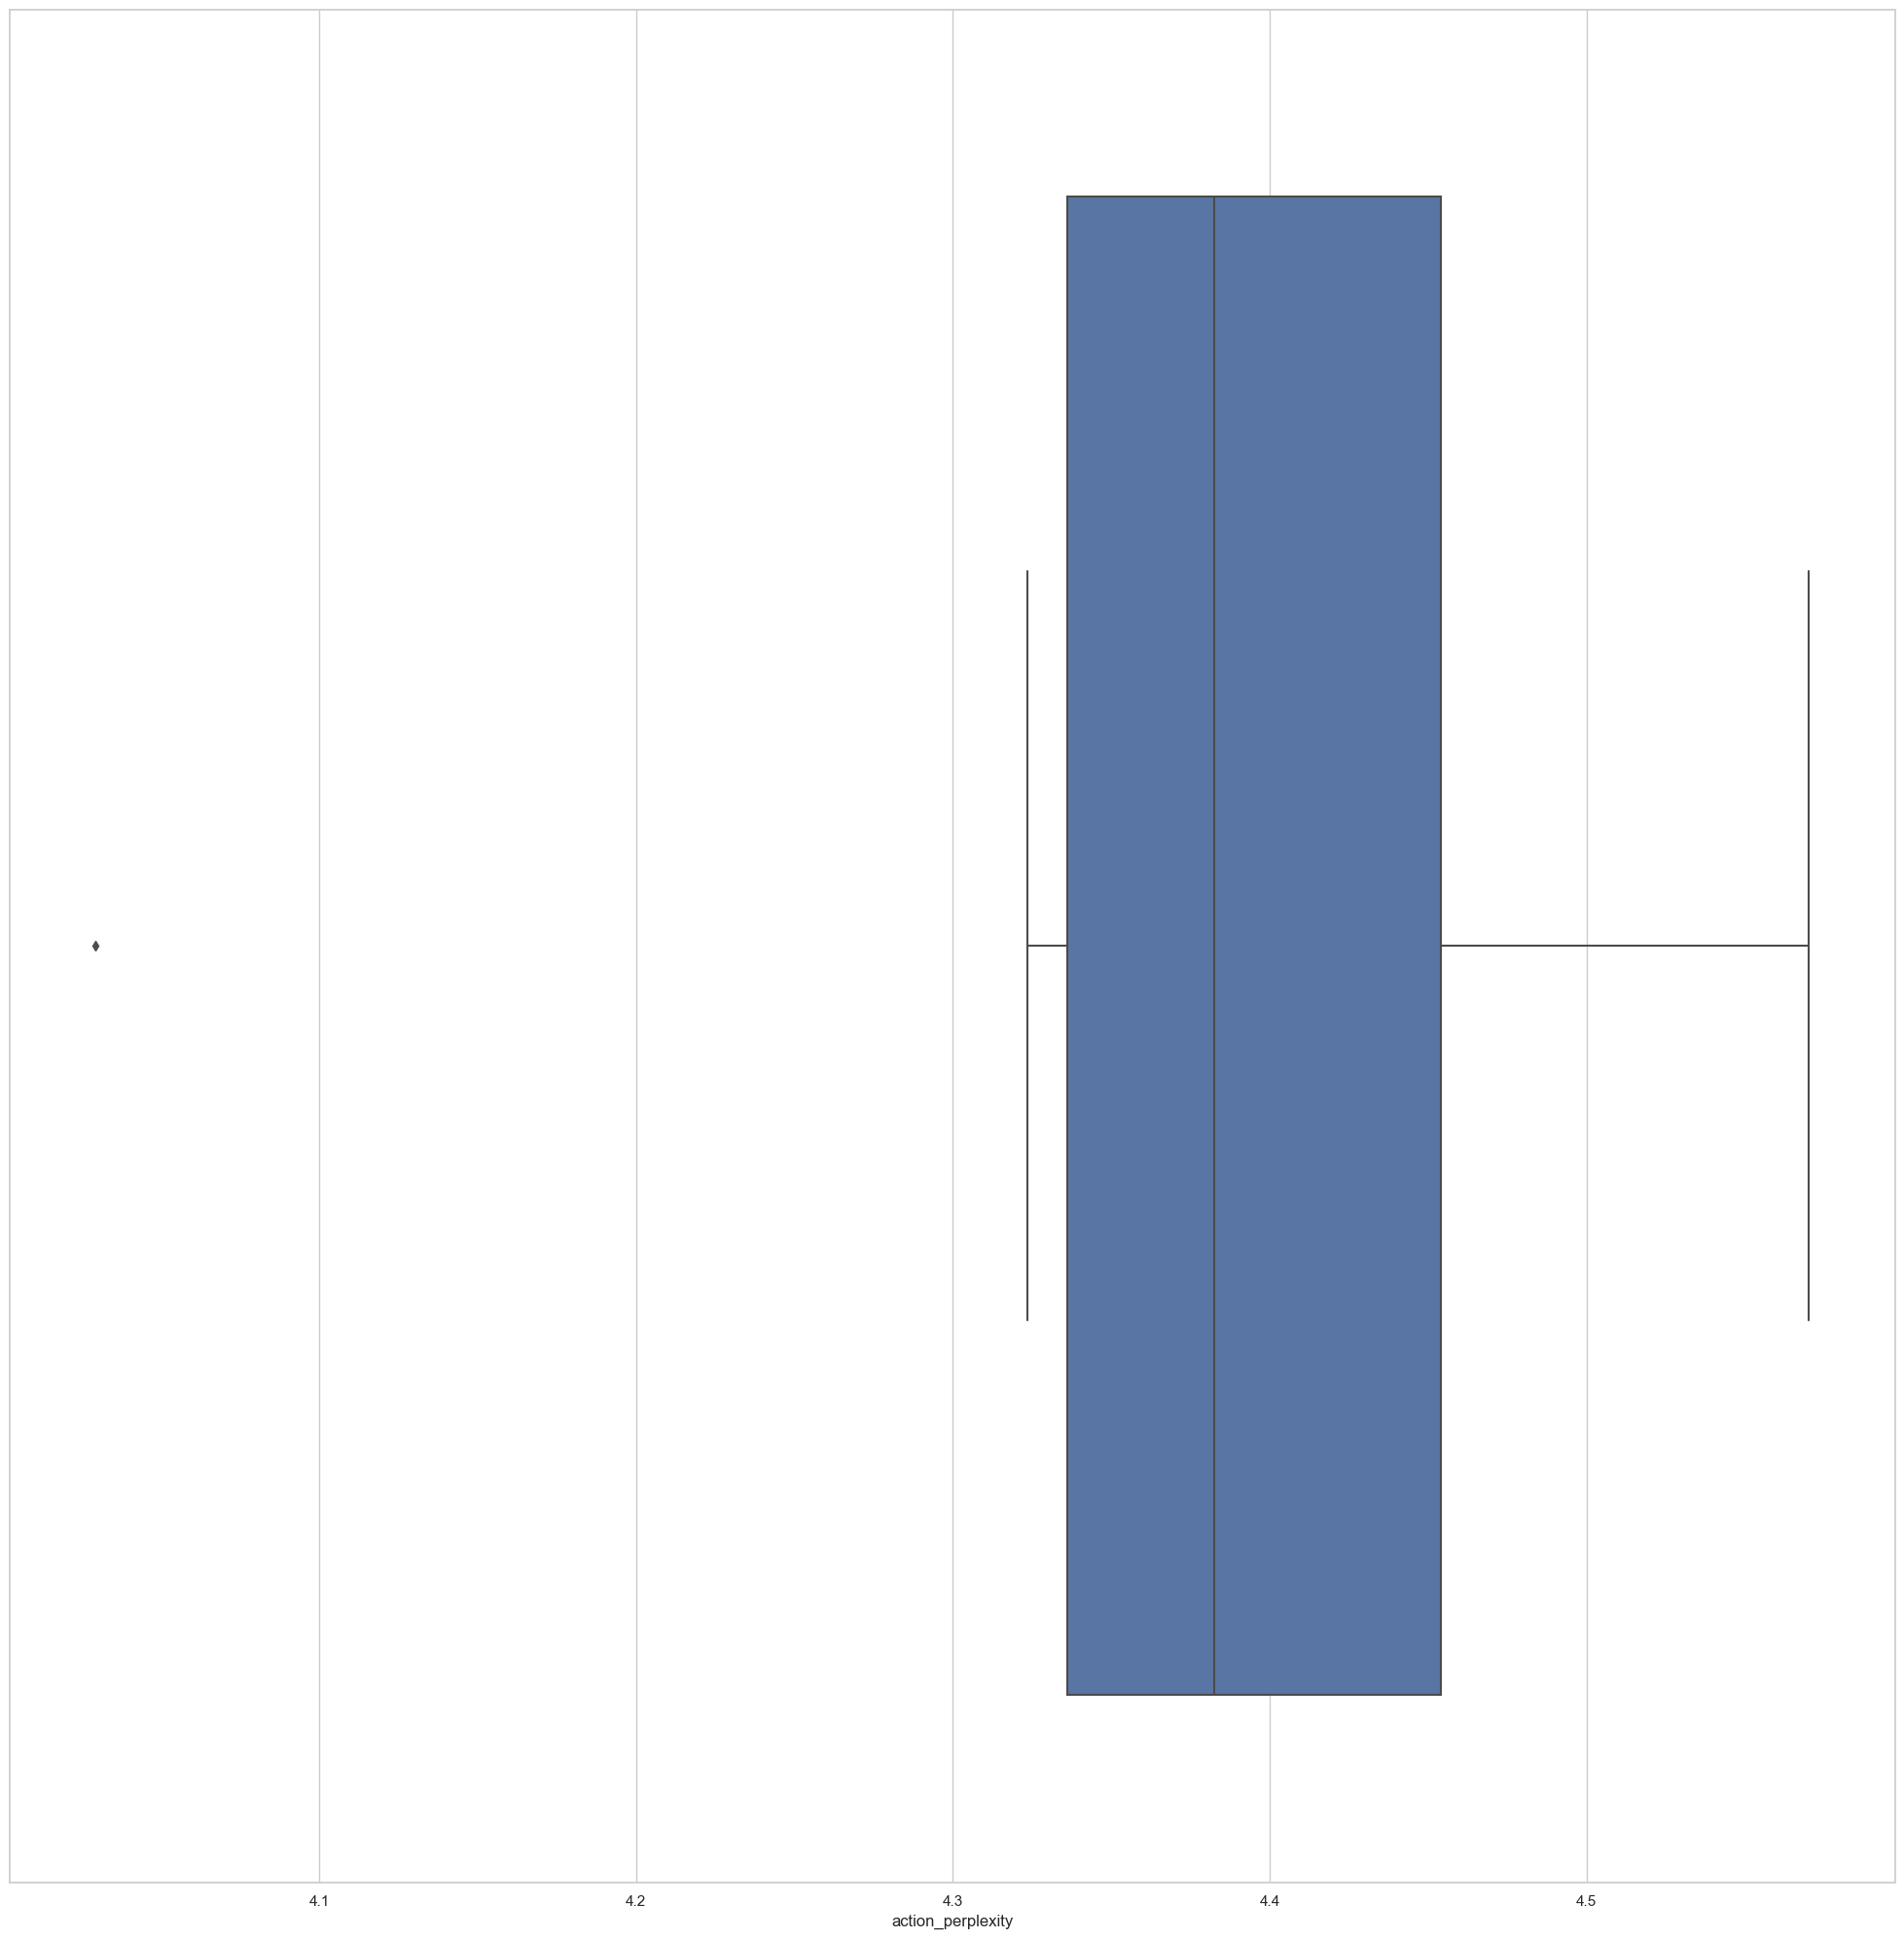

In [61]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=case_study["action_perplexity"], data=case_study)
plt.rcParams["figure.figsize"] = (25,25)
plt.show()

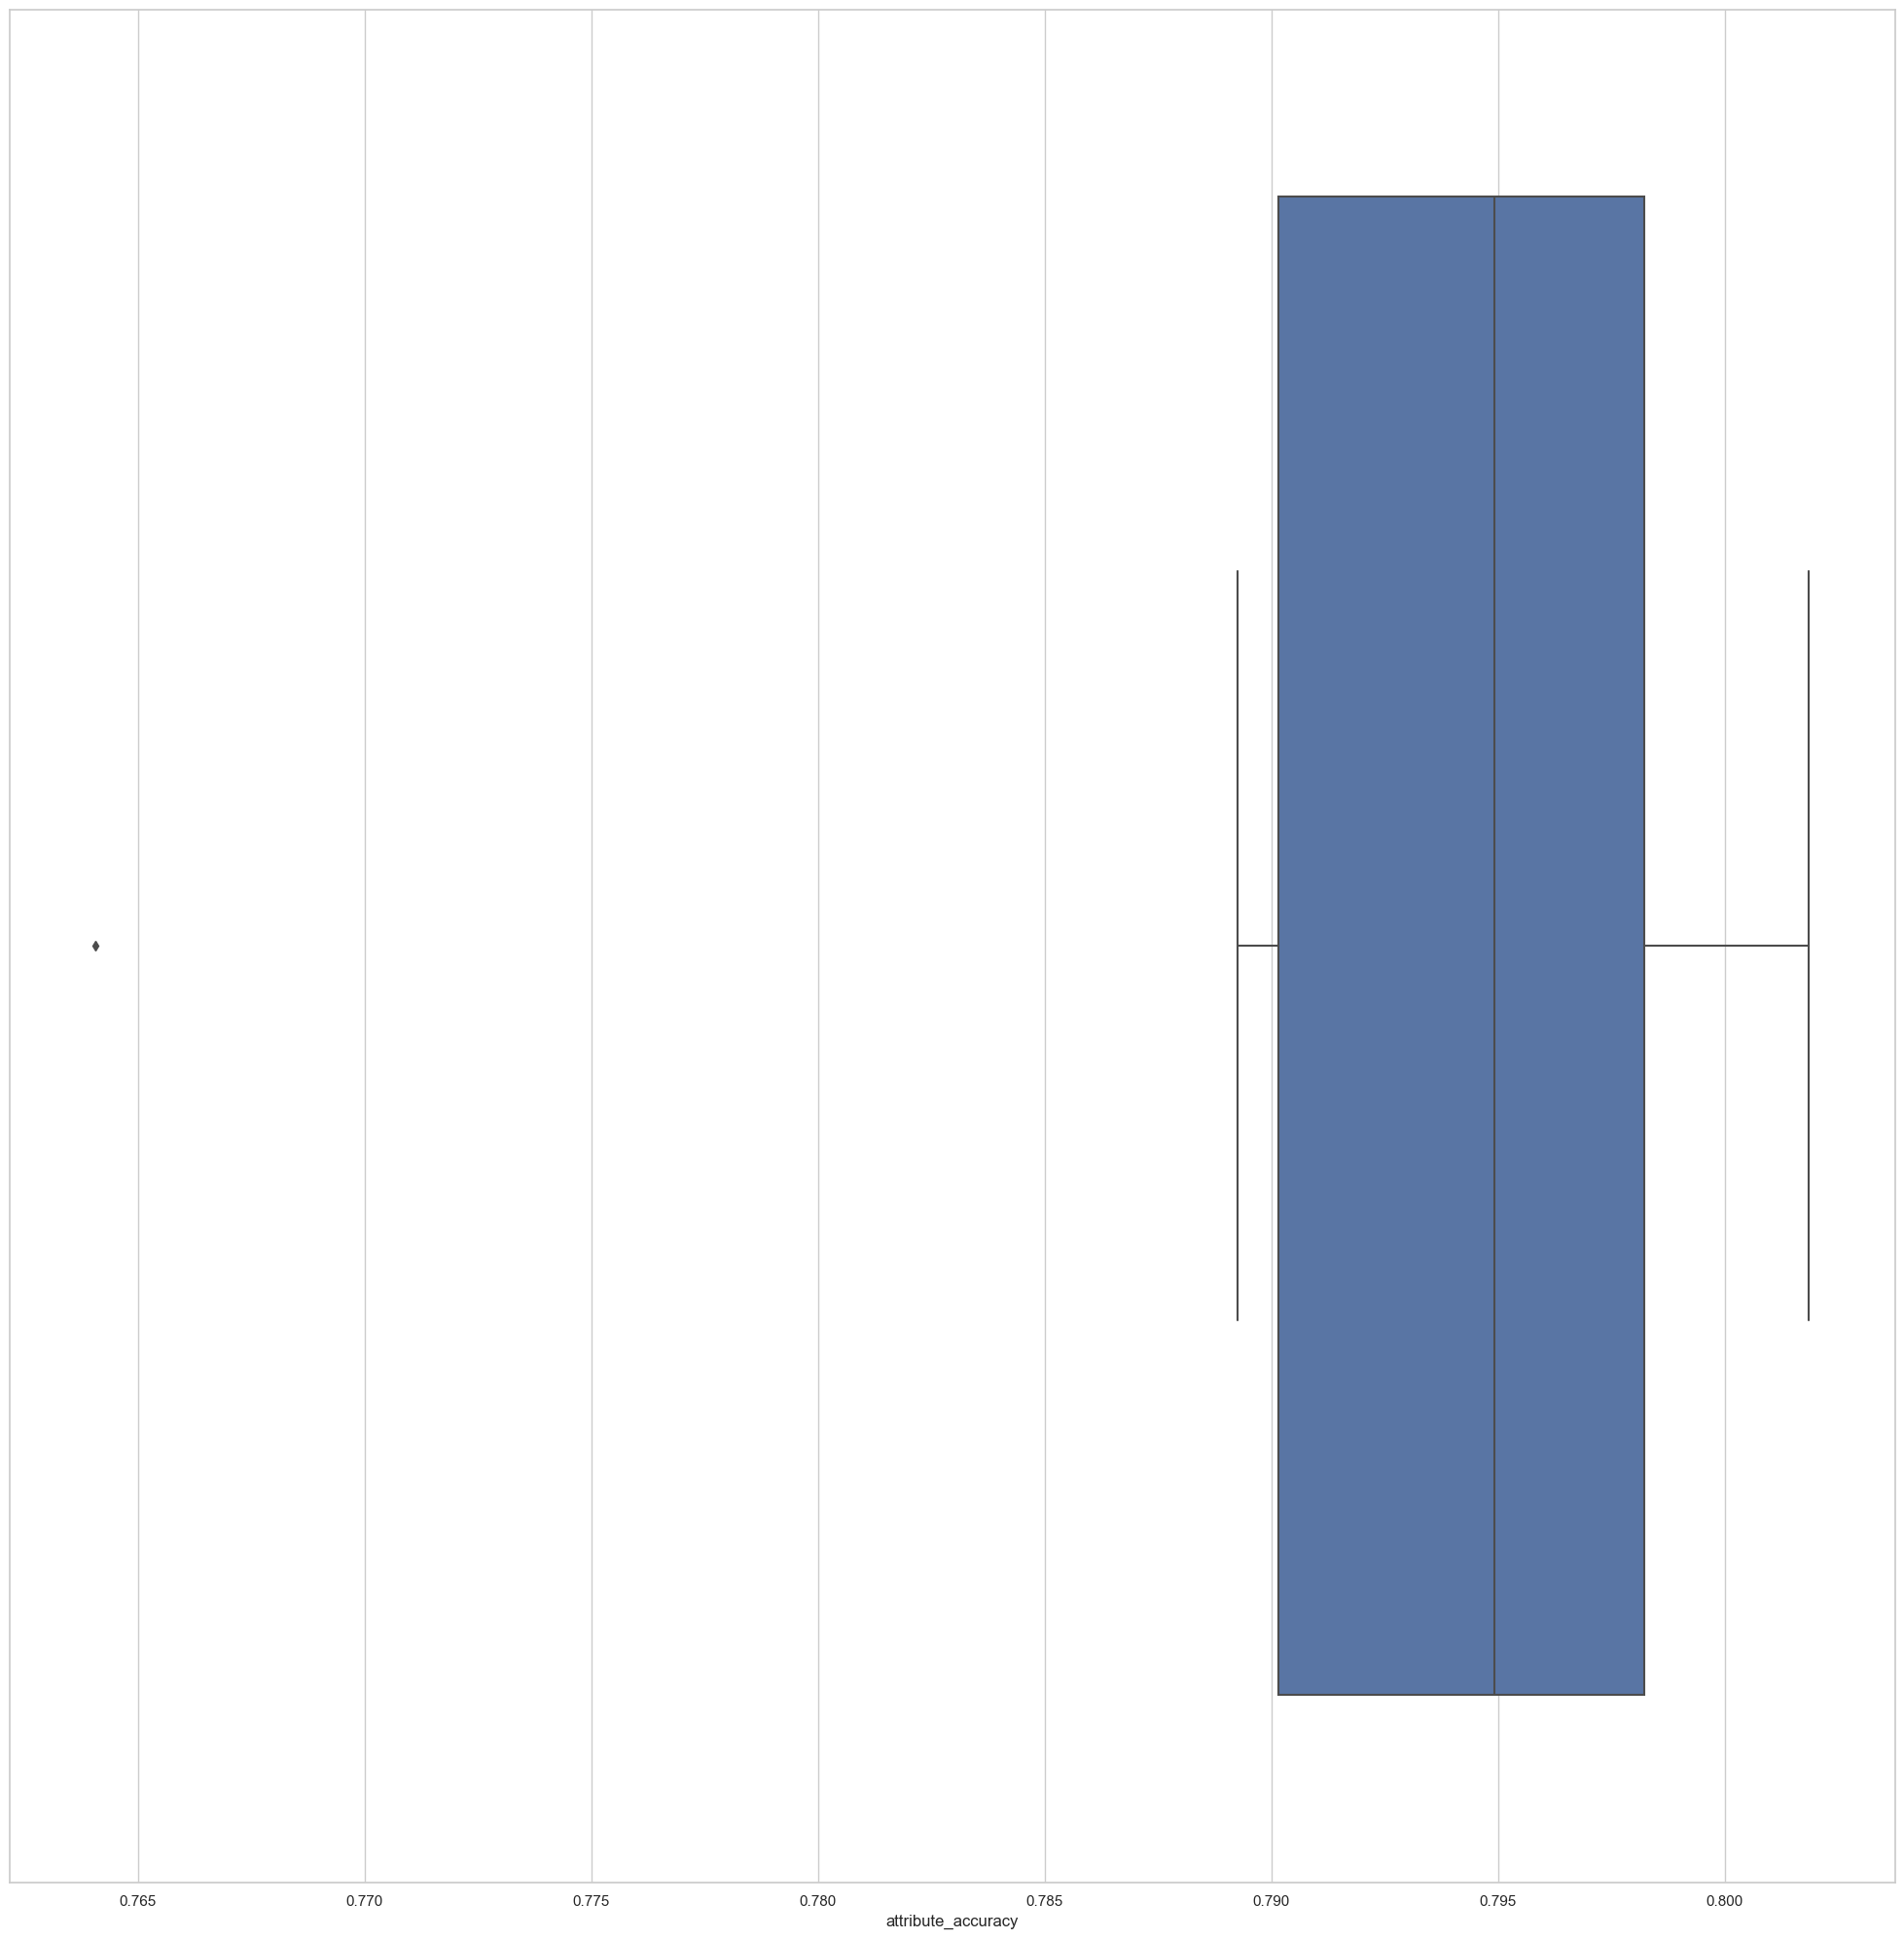

In [62]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=case_study["attribute_accuracy"], data=case_study)
plt.rcParams["figure.figsize"] = (25,25)
plt.show()